In [1]:
import numpy as np
import cv2
import urllib.request
import os
import matplotlib.pyplot as plt

from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.ops import expand_dims, sigmoid

2024-02-20 22:07:17.027384: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 22:07:17.027467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 22:07:17.062633: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-20 22:07:17.141194: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-20 22:07:18.460673: W tensorflow/compiler/tf2

In [2]:
folder_load = "trained_models"

name_file = "model_cifar10_vgg4_20240220-214443.keras"

current_directory = os.getcwd()
file = os.path.join(current_directory, folder_load, name_file)

loaded_model = load_model(file)

2024-02-20 22:07:20.068061: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-20 22:07:20.210434: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-20 22:07:20.210611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

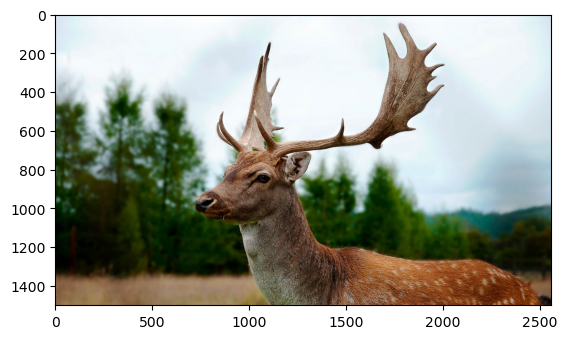

In [3]:
url = "https://fengel-b2b-umbraco-prod.azurewebsites.net/media/tmnd3gb4/hero_d%C3%A5dyr.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
image = cv2.resize(image, (32,32))

image = image.astype('float32')/255.

image = image.reshape((1, 32, 32, 3))

In [5]:
prediction = loaded_model.predict(image)

2024-02-20 22:07:24.348617: I external/local_xla/xla/service/service.cc:168] XLA service 0x5565b043f2a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-20 22:07:24.348651: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-02-20 22:07:24.391592: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-20 22:07:24.576400: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-20 22:07:24.787242: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-20 22:07:25.268375: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 84.81MiB with freed_by_count=0. The caller indicates that t

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1708459646.556262   81651 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [6]:
predicted_class = prediction.argmax()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('Predicted class: ', class_names[predicted_class])

Predicted class:  dog


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


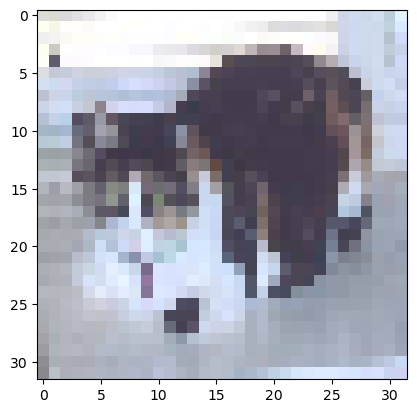

In [7]:
folder_load = "cat_dog/train"

name_file = "cat.459.jpg"

current_directory = os.getcwd()
image = os.path.join(current_directory, folder_load, name_file)


img = load_img(image, target_size=(32, 32))
plt.imshow(img)

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = expand_dims(img_array, axis=0)

predictions = loaded_model.predict(img_array)


In [8]:
predicted_class = predictions.argmax()

print('Predicted class: ', class_names[predicted_class])

Predicted class:  cat
